In [194]:
from urllib.request import urlretrieve

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'data/medical.csv')
medical_df = pd.read_csv('data/medical.csv')

In [165]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [166]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [167]:
# Explore the data 

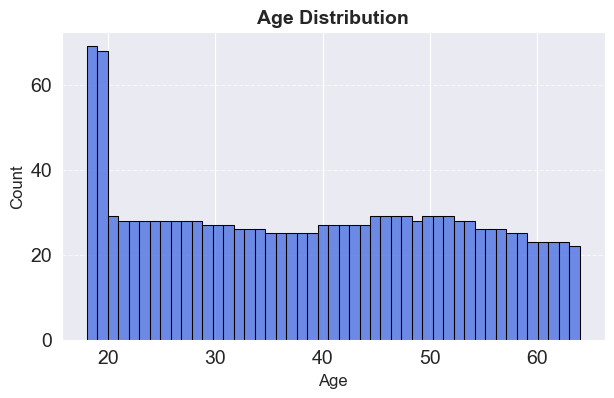

In [168]:
data = medical_df.age

sns.histplot(
    data=data,
    bins=47,
    color="royalblue", 
    edgecolor="black"  
)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Age Distribution", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


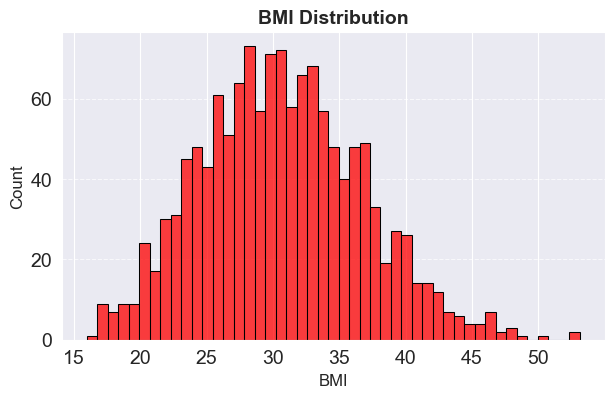

In [169]:
data = medical_df.bmi

sns.histplot(
    data=data,
    bins=47,
    color="red", 
    edgecolor="black"  
)

plt.xlabel("BMI", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("BMI Distribution", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

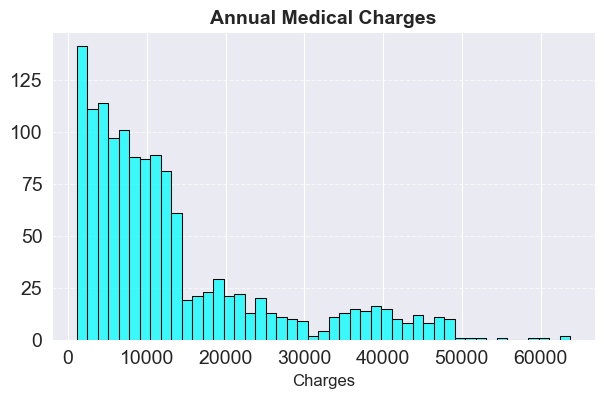

In [170]:
data = medical_df.charges

sns.histplot(
    data=data,
    bins=47,
    color="cyan", 
    edgecolor="black"  
)

plt.xlabel("Charges", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Annual Medical Charges", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

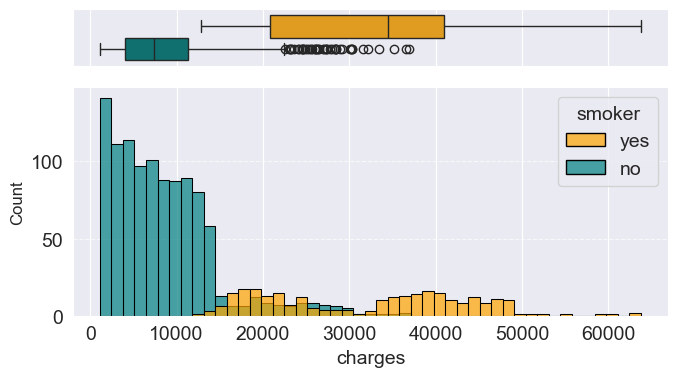

In [171]:

fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 8]})

# Histogram for charges distribution
sns.histplot(
    data=medical_df,
    x="charges",
    bins=47,
    hue="smoker",
    palette={"yes": "orange", "no": "teal"},
    edgecolor="black",
    alpha=0.7,
    ax=axes[1]
)


axes[1].set_ylabel("Count", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Boxplot to show distribution
sns.boxplot(
    data=medical_df,
    x="charges",
    hue="smoker",
    palette={"yes": "orange", "no": "teal"},
    ax=axes[0],
    legend=False
)

axes[0].set_xlabel("Charges", fontsize=12)
axes[0].set_ylabel("")  # Remove Y-axis label for cleaner look

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


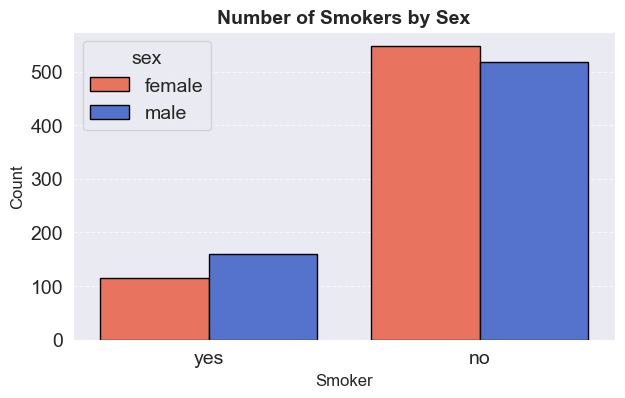

In [172]:
sns.countplot(
    data=medical_df,
    x="smoker",
    hue="sex",
    palette={"male": "royalblue", "female": "tomato"},
    edgecolor="black"
)

plt.xlabel("Smoker", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Smokers by Sex", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


<Axes: xlabel='age', ylabel='charges'>

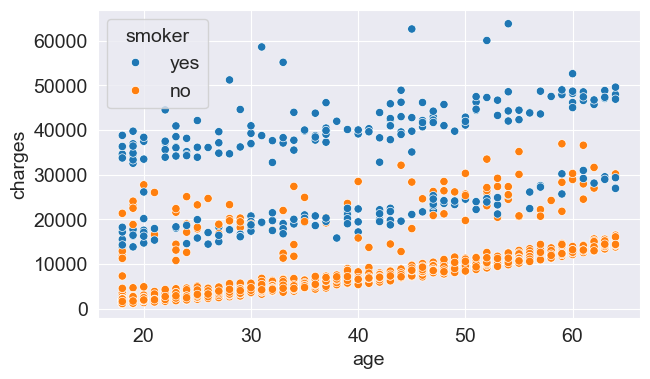

In [173]:
sns.scatterplot(
    medical_df, 
    x='age', 
    y="charges", 
    hue='smoker',
)

<Axes: xlabel='region', ylabel='charges'>

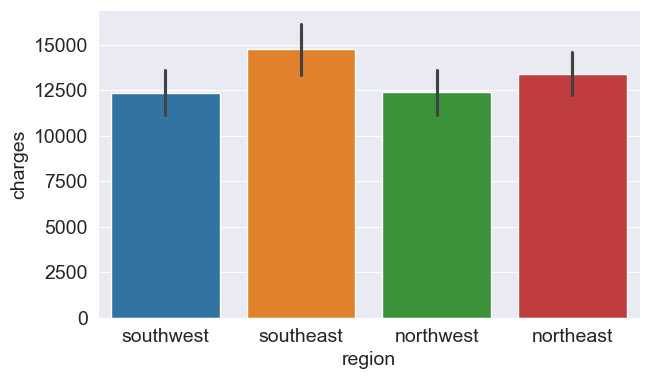

In [174]:
sns.barplot(medical_df, x="region", y='charges', hue="region")

In [175]:
sex_code = {"male" : 1, "female" : 0}
smoker_code = {"yes" : 1 , "no" : 0}

medical_df["sex_code"] = medical_df["sex"].map(sex_code)
medical_df["smoker_code"] = medical_df["smoker"].map(smoker_code)


In [176]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(medical_df[['region']])
onehot = enc.transform(medical_df[["region"]]).toarray()
regions = medical_df.region.unique()
medical_df[regions] = onehot

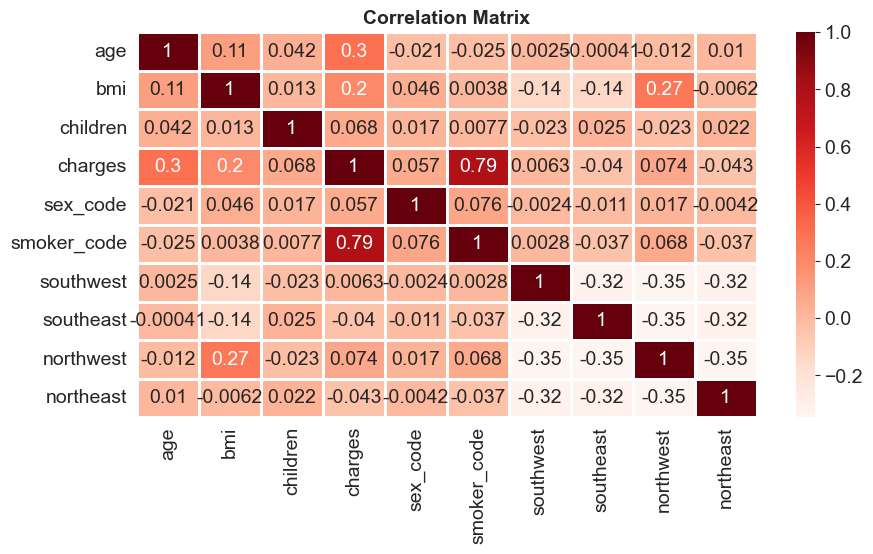

In [177]:
corr_matrix = medical_df[["age", "bmi", "children", "charges",'sex_code', 'smoker_code', *regions]].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix, 
    annot=True,              
    cmap="Reds",    
    linewidths=0.9,       
    cbar=True           
)

plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.show()


In [178]:
from sklearn.model_selection import train_test_split

X = medical_df.select_dtypes(include=['number']).drop(columns="charges")
y = medical_df["charges"]

X_train, X_test, y_train,  y_test =  train_test_split(X, y, train_size=0.33, random_state=42)

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error as RMSE

model = LinearRegression().fit(X_train, y_train)
prediction = model.predict(X_test)
score = model.score(X_test , y_test)
loss = RMSE(y_test, prediction)

print(f"loss : {loss}\nscore : {score} ")

loss : 5938.254501997173
score : 0.7632773883182654 


In [187]:

X_smoker = X.loc[X["smoker_code"] == 1].drop(columns="smoker_code")
y_smoker = y.loc[X["smoker_code"] == 1]

X_none_smoker = X.loc[X["smoker_code"] == 0].drop(columns="smoker_code")
y_none_smoker = y.loc[X["smoker_code"] == 0]

X_train_smoker, X_test_smoker, y_train_smoker, y_test_smoker = train_test_split(
    X_smoker, y_smoker, train_size=0.33, random_state=42
)

X_train_none_smoker, X_test_none_smoker, y_train_none_smoker, y_test_none_smoker = train_test_split(
    X_none_smoker, y_none_smoker, train_size=0.33, random_state=42
)

model_smoker = LinearRegression().fit(X_train_smoker, y_train_smoker)
model_none_smoker = LinearRegression().fit(X_train_none_smoker, y_train_none_smoker)

prediction_smoker = model_smoker.predict(X_test_smoker)
prediction_none_smoker = model_none_smoker.predict(X_test_none_smoker)

score_smoker = model_smoker.score(X_test_smoker, y_test_smoker)
score_none_smoker = model_none_smoker.score(X_test_none_smoker, y_test_none_smoker)

loss_smoker = RMSE(y_test_smoker, prediction_smoker)
loss_none_smoker = RMSE(y_test_none_smoker, prediction_none_smoker)

print(f"Loss Smoker: {loss_smoker:.2f}\nScore Smoker: {score_smoker:.4f}")
print(f"Loss Non-Smoker: {loss_none_smoker:.2f}\nScore Non-Smoker: {score_none_smoker:.4f}")


Loss Smoker: 6288.46
Score Smoker: 0.6947
Loss Non-Smoker: 4752.17
Score Non-Smoker: 0.3725


In [196]:
model.coef_ , model.intercept_

(array([  238.66885386,   384.47618397,   389.18202321,  -506.64816358,
        23273.78035619,   795.18238439,   216.41318623,  -627.70258789,
         -383.89298273]),
 -12728.391196396757)

In [ ]:
input_cols = X.columns

weight_df = pd.DataFrame({
    "features" : np.append(input_cols , "intercept"),
    "weights" : np.append(model.coef_ , model.intercept_)
}) 

weight_df


,features,weights
0,age,238.668854
1,bmi,384.476184
2,children,389.182023
3,sex_code,-506.648164
4,smoker_code,23273.780356
5,southwest,795.182384
6,southeast,216.413186
7,northwest,-627.702588
8,northeast,-383.892983
9,intercept,-12728.391196


In [205]:
from sklearn.preprocessing import StandardScaler

medical_df_standerd = medical_df.copy()

scaler = StandardScaler()

medical_df_standerd[['age', 'bmi', 'children']] = scaler.fit_transform(medical_df_standerd[['age', 'bmi', 'children']])

X_scaled = medical_df_standerd.select_dtypes(include=['number']).drop(columns="charges")
y_scaled = medical_df_standerd["charges"]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, train_size=0.33, random_state=42)


In [ ]:

model_scaled = LinearRegression().fit(X_scaled, y_scaled)
prediction_scaled = model_scaled.predict(X_scaled)
score_scaled = model_scaled.score(X_test_scaled , y_test_scaled)
loss_scaled = RMSE(X_scaled, prediction_scaled)

print(f"loss : {loss_scaled}\nscore : {score_scaled} ")

loss : 5938.254501997173
score : 0.7632773883182653 


In [207]:
input_cols = X.columns

weight_df = pd.DataFrame({
    "features" : np.append(input_cols , "intercept"),
    "weights" : np.append(model_scaled.coef_ , model_scaled.intercept_)
}) 

weight_df

,features,weights
0,age,3352.034609
1,bmi,2343.731308
2,children,468.980751
3,sex_code,-506.648164
4,smoker_code,23273.780356
5,southwest,795.182384
6,southeast,216.413186
7,northwest,-627.702588
8,northeast,-383.892983
9,intercept,8844.572754
